# **Assignment \#4**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2

In [19]:
# TODO: RA & Name 
print('RA1: 231359' + ' Arthur Baia')
print('RA2: 200025' + ' Augusto Marcos')

RA1: 231359 Arthur Baia
RA2: 200025 Augusto Marcos


## Objective

Exploring **unsupervised learning techniques** by using dimensionality reduction techniques.

## Import Libraries

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

## Dataset

Fashion-MNIST is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

Dataset Information:

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.

- The data is available at:
https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip:
‘train’ folder (fashion-mnist train.csv.zip) + ‘test’ folder (fashion-mnist test.csv.zip).

  - You can also download the data by the framework you are using.

- Each training and test example is assigned to one of the following labels: 0 t-shirt/top, 1 trouser, 2 pullover, 3 dress, 4 coat, 5 sandal, 6 shirt, 7 sneaker, 8 bag, 9 ankle boot.
- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.

In [5]:
# Download Fashion-MNIST
#->
# get the files from a URL on dropbox
url = 'https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip'
# download the file
!wget -O fashion-mnist-dataset.zip $url
# unzip the file
!unzip -q fashion-mnist-dataset.zip

# the dataset is now in the folder 'fashion-mnist-dataset' and the files are named fashion-mnist_train.csv.zip and fashion-mnist_test.csv.zip, unzip them
!unzip -q fashion-mnist-dataset/fashion-mnist_train.csv.zip -d fashion-mnist-dataset
!unzip -q fashion-mnist-dataset/fashion-mnist_test.csv.zip -d fashion-mnist-dataset


'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [21]:
# Load the data
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [22]:
# split the train into train and validation

train, val = np.split(train, [int(.8*len(train))])

# convert the dataframes to numpy arrays

train = train.to_numpy()
val = val.to_numpy()
test = test.to_numpy()


x_train, y_train = train[:, 1:], train[:, 0]
x_val, y_val =  val[:, 1:], val[:, 0]

In [23]:
x_test, y_test = test[:, 1:], test[:, 0]


In [24]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [7]:
x_test.shape, y_test.shape

((10000, 784), (10000,))

In [28]:
# reshape the data to 28x28 images, to be used with the convolutional layers
x_train = x_train.reshape(-1, 28, 28, 1) # batch_size, height, width, channels
x_val = x_val.reshape(-1, 28, 28, 1) # batch_size, height, width, channels
x_test = x_test.reshape(-1, 28, 28, 1) # batch_size, height, width, channels
x_train.shape, x_val.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
labels_dict = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

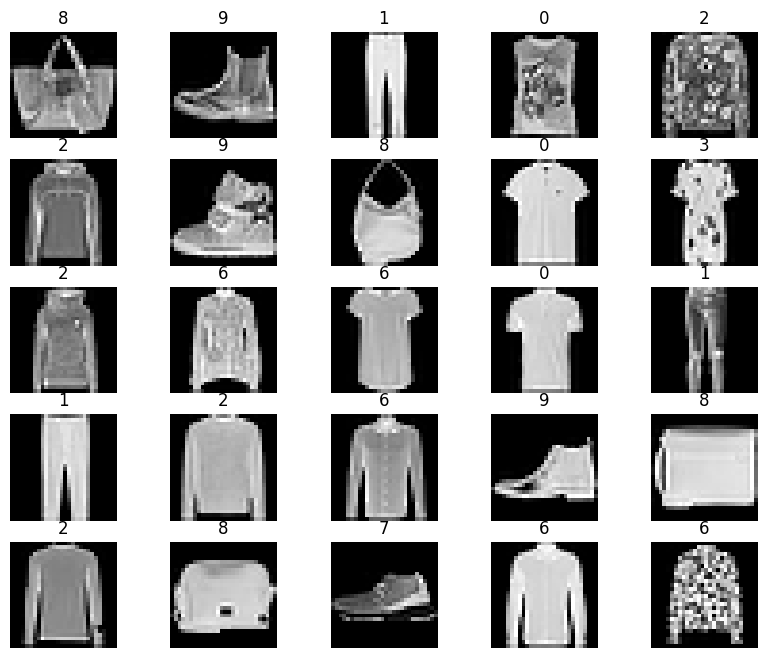

In [16]:
# Plot a data grid for general observation
# ->
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(x_train), size=(1,)).item()
    img, label = x_train[sample_idx], y_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### Activities

1. (2 points) Baseline: Explore Convolutional Neural Networks with Fashion-MNIST. What is the accuracy of your CNN model? (1.5 points) Describe your Convolutional Neural Network architecture. (0.5 points) What are your conclusions about the baseline?

In [17]:
# Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))) #conv layer 1
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer -> max pooling


model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) #conv layer 2

model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer 2 -> max pooling

model.add(Flatten()) #flattening data to input in dense layer
model.add(Dense(10, activation="softmax")) #fully conected layer with 10 outputs


model.compile( 
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
) 


In [18]:
batch_size = 64
epochs = 10


train_model = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_val, y_val),
)


Epoch 1/10
 17/750 [..............................] - ETA: 47s - loss: 9.7469 - accuracy: 0.3998 

KeyboardInterrupt: 

In [16]:
# Evaluate the model using the test set
# ->
score = model.evaluate(x_test, y_test, verbose=1)
print(f'loss: {score[0]} - accuracy: {score[1]}')

313/313 [==============================] - 2s 5ms/step - loss: 0.3377 - accuracy: 0.8888
loss: 0.3376905620098114 - accuracy: 0.8888000249862671


# What are your conclusions about the baseline? 
The baseline model has a loss of 0.29 and an accuracy of 0.89. This is a good result, but 
it can be improved by using more layers and regularization techniques, such as batch normalization and dropout.

2. (2 points) Using PCA: Re-do the first experiment considering the PCA dimensionality reduction. (1.5 points) Consider two different energies (variance) for reducing the image dimensionality. (0.5 points) What are the conclusions when using PCA in this problem? Does the accuracy improve?

In [17]:
# Run PCA methods
from sklearn.decomposition import PCA

for i in range(1, 5):
    print("PCA with {} components".format(i))
    pca = PCA(n_components=i)

    pca.fit(x_train.reshape(-1, 28 * 28))
    # print the first two principal components
    # print the amount of variance explained by each principal component
    print("pca explained variance ratio")
    print(pca.explained_variance_ratio_)
    # print the amount of variance explained by the first two principal components
    print("pca explained variance ratio sum")
    print(f"Sum: {pca.explained_variance_ratio_.sum(): .2f}")


PCA with 1 components
pca explained variance ratio
[0.29039944]
pca explained variance ratio sum
Sum:  0.29
PCA with 2 components
pca explained variance ratio
[0.29039944 0.17722291]
pca explained variance ratio sum
Sum:  0.47
PCA with 3 components
pca explained variance ratio
[0.29039944 0.17722291 0.0603061 ]
pca explained variance ratio sum
Sum:  0.53
PCA with 4 components
pca explained variance ratio
[0.29039944 0.17722291 0.0603061  0.04977525]
pca explained variance ratio sum
Sum:  0.58


In [18]:
# train a logistic regression model on the PCA transformed data
# ->
def train_model(x_train, y_train, x_val, y_val, pca, batch_size=64, epochs=10, verbose = 1):
    pca.fit(x_train.reshape(-1, 28 * 28))
    x_train_pca = pca.transform(
        x_train.reshape(-1, 28 * 28)
    )  # shape (48000, 28, 28, 1) -> (48000, 2)
    x_val_pca = pca.transform(
        x_val.reshape(-1, 28 * 28)
    )  # shape (10000, 28, 28, 1) -> (10000, 2)

    model = Sequential()
    model.add(Dense(10, activation="softmax"))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"],
    )
    train_model = model.fit(
        x_train_pca,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=verbose,
        validation_data=(x_val_pca, y_val),
    )

    # get the last validation accuracy
    val_acc = train_model.history["val_accuracy"][-1]

    return model, val_acc


In [19]:
pca = PCA(n_components=2)
acc = train_model(x_train, y_train, x_val, y_val, pca=pca)
print(f"Accuracy: {acc[1]: .2f}")

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 306.0216 - accuracy: 0.2359 - val_loss: 48.9225 - val_accuracy: 0.3076
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 18.0998 - accuracy: 0.3800 - val_loss: 9.2995 - val_accuracy: 0.4245
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 8.4277 - accuracy: 0.3904 - val_loss: 7.0409 - val_accuracy: 0.3837
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 5.8925 - accuracy: 0.3933 - val_loss: 4.4578 - val_accuracy: 0.3898
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 3.1648 - accuracy: 0.4044 - val_loss: 1.8308 - val_accuracy: 0.4333
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 1.4147 - accuracy: 0.4194 - val_loss: 1.4351 - val_accuracy: 0.4103
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 1.3817 - accuracy: 0.4189 - val_loss: 1.3167 - val_accuracy: 0.4238
Ep

In [20]:
pca = PCA(n_components=3)
acc = train_model(x_train, y_train, x_val, y_val, pca=pca)
print(f"Accuracy: {acc[1]: .2f}")

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 247.2889 - accuracy: 0.2686 - val_loss: 44.0528 - val_accuracy: 0.4332
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 21.2143 - accuracy: 0.4665 - val_loss: 9.9970 - val_accuracy: 0.4917
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 5.5597 - accuracy: 0.5115 - val_loss: 2.8488 - val_accuracy: 0.5439
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 1.9054 - accuracy: 0.5094 - val_loss: 1.7274 - val_accuracy: 0.5213
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6040 - accuracy: 0.5188 - val_loss: 1.5450 - val_accuracy: 0.5166
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 1.4110 - accuracy: 0.5213 - val_loss: 1.3733 - val_accuracy: 0.5345
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 1.2366 - accuracy: 0.5205 - val_loss: 1.2788 - val_accuracy: 0.5166
Ep

3. (0.5 point) What can we infer when analyzing the breakdown of data into components using a chart to plot the data in 2-dimensional space to view separation?

In [21]:
# In order to see how the PCA components are separating out the digits, lets use the following method, plot_components, to plot the data in a 2 dimensional space to view separation.
# The input parameters are the PCA fit in X and the labels
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

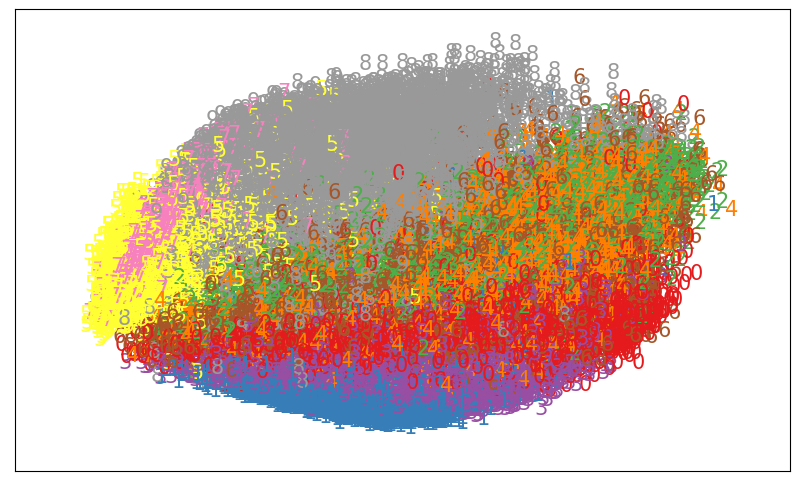

In [22]:
# The input parameters are the PCA fit in X and the labels
pca = PCA(n_components=2)
pca.fit(x_train.reshape(-1, 28 * 28))
X = pca.transform(x_train.reshape(-1, 28 * 28))
plot_components(X, y_train)

4. (2 points) How many components are needed for a better evaluation of the model? Define the minimum and maximum components to be tested using the energies_number method. How can we evaluate this graph and the quantity that was defined as best for the problem?

In [23]:
# Iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same random neural network.

def energies_number(min, max, x_train, y_train, x_val, y_val):
    # Select a range of min and max number of dimensions, min/max.

    acc_list, pc_list = [], []
    for pc in range(min,max):
        print("PCA with {} components".format(pc))
        pca = PCA(n_components=pc)
        acc = train_model(x_train, y_train, x_val, y_val, pca=pca, verbose=0)
        acc_list.append(acc[1])
        pc_list.append(pc)
    return acc_list, pc_list

acc_list, pc_list = energies_number(1, 120, x_train, y_train, x_val, y_val)

PCA with 1 components
PCA with 2 components
PCA with 3 components
PCA with 4 components
PCA with 5 components
PCA with 6 components
PCA with 7 components
PCA with 8 components
PCA with 9 components
PCA with 10 components
PCA with 11 components
PCA with 12 components
PCA with 13 components
PCA with 14 components
PCA with 15 components
PCA with 16 components
PCA with 17 components
PCA with 18 components
PCA with 19 components
PCA with 20 components
PCA with 21 components
PCA with 22 components
PCA with 23 components
PCA with 24 components
PCA with 25 components
PCA with 26 components
PCA with 27 components
PCA with 28 components
PCA with 29 components
PCA with 30 components
PCA with 31 components
PCA with 32 components
PCA with 33 components
PCA with 34 components
PCA with 35 components
PCA with 36 components


KeyboardInterrupt: 

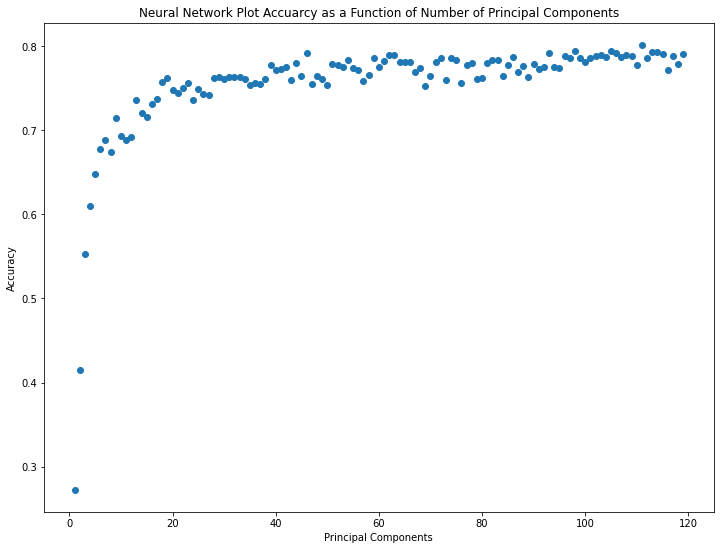

In [67]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Neural Network Plot Accuracy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')

In [68]:
print('The maximum accuracy attained is ',np.max(acc_list),'% with ',pc_list[np.where(acc_list == np.max(acc_list))[0][0]],' principal components. Beyond this peak, additional principal components appear to mostly contribute noise.')

The maximum accuracy attained is  0.8015833497047424 % with  111  principal components. Beyond this peak, additional principal components appear to mostly contribute noise.


5. (3.5 points) Using Autoencoders: Re-do the first experiment (question 2) considering Autoencoders for reducing the image dimensionality. (3 points) Consider two different latent vector sizes for reducing the image dimensionality. (0.5 points) What are the conclusions when using Autoencoders in this problem? Does accuracy improve? 

Autoencoders are a branch of neural networks which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set. Typically the autoencoder is trained over some iterations using gradient descent, minimizing the mean squared error.
The key component is the “bottleneck” hidden layer. This is where the information from the input has been compressed. By extracting this layer from the model, each node can be treated as a variable in the same way each chosen principal component is used in the following models.

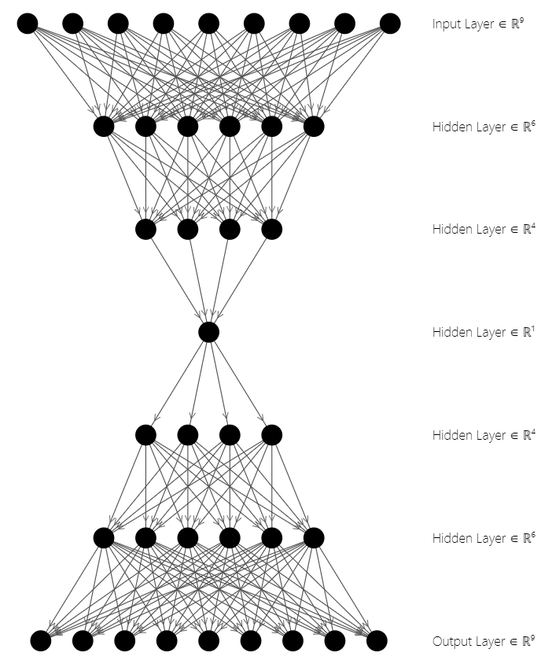

In [42]:
# Create your AutoEncoder network architecture:

# Based on the PCA Analysis, lets make the middle layer (i.e. the final dimension) with 111 features

from keras import layers
import keras


# input
input= keras.Input(shape=(784,))

encoder1 = layers.Dense(512, activation="relu")(input) #latent vector 1

encoder2 = layers.Dense(256, activation="relu")(encoder1) #latent vector 2

middle = layers.Dense(128, activation="relu")(encoder2)

decoder2 = layers.Dense(256, activation="relu")(middle)

decoder1 = layers.Dense(512, activation="relu")(decoder2)

output = layers.Dense(784, activation='sigmoid')(decoder1)
#output


#autoencoder model
autoencoder = keras.Model(input, output)



In [43]:
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 256)               33024     
                                                                 
 dense_41 (Dense)            (None, 512)               131584    
                                                                 
 dense_42 (Dense)            (None, 784)               4021

In [44]:
x_train_res = x_train.reshape(x_train.shape[0], 784).astype('float32')/255
x_val_res = x_val.reshape(x_val.shape[0], 784).astype('float32')/255


history = autoencoder.fit(x_train_res, x_train_res, epochs=20, batch_size=64, verbose=2, validation_data=(x_val_res,x_val_res))


Epoch 1/20
750/750 - 22s - loss: 0.3236 - val_loss: 0.3052 - 22s/epoch - 29ms/step
Epoch 2/20
750/750 - 18s - loss: 0.2989 - val_loss: 0.2971 - 18s/epoch - 24ms/step
Epoch 3/20
750/750 - 18s - loss: 0.2947 - val_loss: 0.2935 - 18s/epoch - 24ms/step
Epoch 4/20
750/750 - 19s - loss: 0.2931 - val_loss: 0.2943 - 19s/epoch - 25ms/step
Epoch 5/20
750/750 - 19s - loss: 0.2922 - val_loss: 0.2921 - 19s/epoch - 26ms/step
Epoch 6/20
750/750 - 19s - loss: 0.2915 - val_loss: 0.2932 - 19s/epoch - 25ms/step
Epoch 7/20
750/750 - 18s - loss: 0.2914 - val_loss: 0.2923 - 18s/epoch - 24ms/step
Epoch 8/20
750/750 - 19s - loss: 0.2913 - val_loss: 0.2922 - 19s/epoch - 25ms/step
Epoch 9/20
750/750 - 20s - loss: 0.2911 - val_loss: 0.2913 - 20s/epoch - 27ms/step
Epoch 10/20
750/750 - 19s - loss: 0.2907 - val_loss: 0.2944 - 19s/epoch - 26ms/step
Epoch 11/20
750/750 - 18s - loss: 0.2905 - val_loss: 0.2923 - 18s/epoch - 23ms/step
Epoch 12/20
750/750 - 17s - loss: 0.2910 - val_loss: 0.2927 - 17s/epoch - 23ms/step
E

In [53]:
# Re-do the first experiment (question 2) considering the autoencoder dimensionality reduction
# get the encoder part of the autoencoder
encoder = keras.Model(input, middle)

# get the encoded representation of the training data
encoded_imgs = encoder.predict(x_train.reshape(-1, 28 * 28))

# get the encoded representation of the validation data

encoded_imgs_val = encoder.predict(x_val.reshape(-1, 28 * 28))

# Train a neural network with the encoded representation of the training data and the labels

model = Sequential()
model.add(Dense(10, activation="softmax"))
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

train_model = model.fit(
    encoded_imgs,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(encoded_imgs_val, y_val),
)

375/375 [==============================] - 3s 8ms/step
Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 50.4721 - accuracy: 0.5449 - val_loss: 4.7437 - val_accuracy: 0.7167
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 2.4393 - accuracy: 0.7236 - val_loss: 1.5041 - val_accuracy: 0.6758
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 1.1131 - accuracy: 0.7208 - val_loss: 1.0535 - val_accuracy: 0.6737
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.9888 - accuracy: 0.7160 - val_loss: 1.0880 - val_accuracy: 0.6904
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.9534 - accuracy: 0.7212 - val_loss: 0.8081 - val_accuracy: 0.7574
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.9609 - accuracy: 0.7193 - val_loss: 1.0125 - val_accuracy: 0.7270
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.9486 - accuracy:

In [ ]:
# What are the conclusions when using Autoencoders in this problem? Does accuracy improve?



## Deadline

Monday, November 18, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- November 19, 11:59 pm : grade * 0.75
- November 20, 11:59 pm : grade * 0.5
- November 21, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**